In [14]:
import sqlite3
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
from sqlalchemy import create_engine
engine=create_engine('sqlite:///database.sqlite')

In [4]:
cnx = sqlite3.connect('database.sqlite')

In [5]:
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [6]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [7]:
df.describe().transpose()#simple statistics of our dataset

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


In [9]:
#is any row NULL ?
df.isnull().any().any()

True

In [10]:
#how many data points in each column are null.
df.isnull().sum(axis=0)

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [11]:
# Drop the NULL rows
df = df.dropna()

In [12]:
#Check if all NULLS are gone ?
df.isnull().any().any()

False

In [15]:
#Shuffle the rows of df so we get a distributed sample when we display top few rows

df = df.reindex(np.random.permutation(df.index))

In [16]:
#lets look at top 5rows in the dataset
df.head(5)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
63631,63632,202848,252650,2013-11-01 00:00:00,71.0,79.0,right,high,medium,66.0,...,60.0,56.0,25.0,25.0,25.0,9.0,8.0,14.0,6.0,11.0
106317,106318,121988,37335,2015-02-13 00:00:00,71.0,71.0,right,medium,medium,25.0,...,25.0,30.0,25.0,25.0,25.0,72.0,68.0,59.0,69.0,76.0
67569,67570,156432,37554,2014-02-21 00:00:00,73.0,73.0,right,medium,low,68.0,...,68.0,74.0,44.0,51.0,34.0,10.0,8.0,12.0,12.0,15.0
9735,9736,41196,34983,2013-02-15 00:00:00,60.0,60.0,right,low,low,43.0,...,72.0,67.0,15.0,12.0,14.0,13.0,12.0,14.0,15.0,9.0
11734,11735,178042,41865,2012-08-31 00:00:00,70.0,75.0,left,medium,medium,65.0,...,44.0,42.0,72.0,72.0,70.0,8.0,9.0,7.0,11.0,13.0


In [17]:
#Feature Correlation Analysis
#we will check if ‘penalties’ is correlated to ‘overall_rating’ using pearson's coefficient
df['overall_rating'].corr(df['penalties'])

0.39271510791118786

In [18]:
#not a very strong correlation but there is some correlation
#Create a list of potential Features that you want to measure correlation with
potentialFeatures = ['acceleration', 'curve', 'free_kick_accuracy', 'ball_control', 'shot_power', 'stamina']

In [20]:
# check how the features are correlated with the overall ratings.
#The for loop below prints out the correlation coefficient of “overall_rating” of a player with each feature we added to the list as potential.

for f in potentialFeatures:
    related = df['overall_rating'].corr(df[f])
    print("%s: %f" % (f,related))
    
#Looking at the values printed by the previous cell, we notice that the to two are “ball_control” (0.44) and “shot_power” (0.43). So these two features seem to have higher correlation with “overall_rating”.

acceleration: 0.243998
curve: 0.357566
free_kick_accuracy: 0.349800
ball_control: 0.443991
shot_power: 0.428053
stamina: 0.325606


In [21]:
#Data visualization
#Next we will start plotting the correlation coefficients of each feature with “overall_rating”. We start by selecting the columns and creating a list with correlation coefficients, called “correlations”.
cols = ['potential',  'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

In [22]:
# create a list containing Pearson's correlation between 'overall_rating' with each column in cols
correlations = [ df['overall_rating'].corr(df[f]) for f in cols ]

In [25]:
# create a function for plotting a 2D dataframe of these correlation names and correlation values

def plot_dataframe(df, y_label):  
    color='green'
    fig = plt.gcf()
    fig.set_size_inches(20, 12)
    plt.ylabel(y_label)

    ax = df2.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df2.index)
    ax.set_xticklabels(df2.attributes, rotation=75);
    plt.show()

In [26]:
# create a dataframe using cols and correlations

df2 = pd.DataFrame({'attributes': cols, 'correlation': correlations})

In [29]:
# let's plot above dataframe using the function we created
import matplotlib.pyplot as plt
    
plot_dataframe(df2, 'Player\'s Overall Rating')

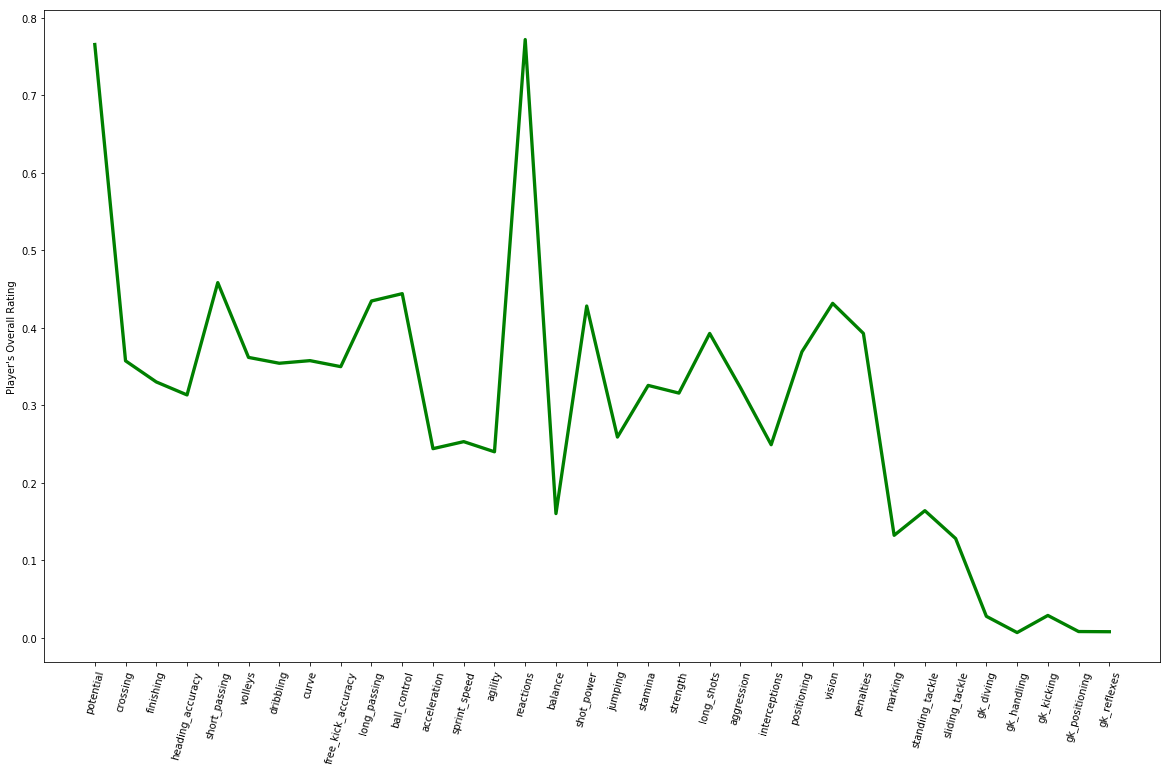

In [30]:
# let's plot above dataframe using the function we created
    
plot_dataframe(df2, 'Player\'s Overall Rating')

In [31]:
#Select Features on Which to Group Players
# Define the features you want to use for grouping players

select5features = ['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']
select5features

['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']

In [38]:
# Generate a new dataframe by selecting the features you just defined

df_select = df[select5features]

In [39]:
df_select.head()

,gk_kicking,potential,marking,interceptions,standing_tackle
63631,14.0,79.0,25.0,25.0,25.0
106317,59.0,71.0,25.0,23.0,25.0
67569,12.0,73.0,44.0,33.0,51.0
9735,14.0,60.0,15.0,22.0,12.0
11734,7.0,75.0,72.0,70.0,72.0


In [41]:
#Perform KMeans Clustering to cluster the values (i.e., player features on gk_kicking, potential, marking, interceptions, and standing_tackle). 
#We will go with four clusters.
# Perform scaling on the dataframe containing the features
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

data = scale(df_select)

# Define number of clusters
noOfClusters = 4

# Train a model
model = KMeans(init='k-means++', n_clusters=noOfClusters, n_init=20).fit(data)

In [42]:
print(90*'_')
print("\nCount of players in each cluster")
print(90*'_')

pd.value_counts(model.labels_, sort=False)

__________________________________________________________________________________________

Count of players in each cluster
__________________________________________________________________________________________


0    55903
1    50197
2    23777
3    50477
dtype: int64

In [46]:
def pd_centers(featuresUsed, centers):
    from itertools import cycle, islice
    from pandas.tools.plotting import parallel_coordinates
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    
    colNames = list(featuresUsed)
    colNames.append('prediction')
    # Zip with a column called 'prediction' (index)
    Z = [np.append(A, index) for index, A in enumerate(centers)]
    
    # Convert to pandas for plotting
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

def parallel_plot(data):
    from itertools import cycle, islice
    from pandas.tools.plotting import parallel_coordinates
    import matplotlib.pyplot as plt
    
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-2.5,+2.5])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [47]:
# Create a composite dataframe for plotting
# ... Use custom function declared in customplot.py (which we imported at the beginning of this notebook)

P_c = pd_centers(featuresUsed=select5features, centers=model.cluster_centers_)
P_c

,gk_kicking,potential,marking,interceptions,standing_tackle,prediction
0,-0.477103,0.105731,-0.947589,-0.975149,-0.914172,0
1,-0.337513,-0.843536,0.548321,0.407443,0.550883,1
2,1.920631,0.037763,-1.111727,-0.653150,-1.200879,2
3,-0.040425,0.704392,1.027857,0.982533,1.030287,3


In [48]:
#Visualization of Clusters
#We now have 4 clusters based on the features we selected, we can treat them as profiles for similar groups of players. We can visualize these profiles by plotting the centers for each cluster, i.e., the average values for each featuere within the cluster. We will use matplotlib for this visualization

# For plotting the graph inside the notebook itself, we use the following command

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.


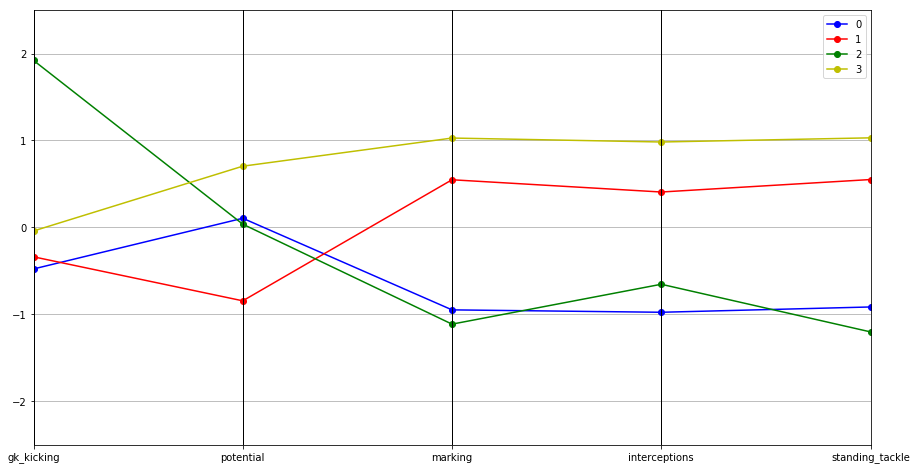

In [50]:
parallel_plot(P_c)

In [ ]:
#Analysis of Findings

#Two groups are very similar except in gk_kicking - these players can coach each other on gk_kicking, where they differ.
#Two groups are somewhat similar to each other except in potential.